<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Notes" data-toc-modified-id="Notes-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Notes</a></span></li><li><span><a href="#Assignment-#1" data-toc-modified-id="Assignment-#1-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Assignment #1</a></span></li><li><span><a href="#Assignment-#2" data-toc-modified-id="Assignment-#2-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Assignment #2</a></span></li><li><span><a href="#Challenge" data-toc-modified-id="Challenge-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge</a></span></li></ul></div>

# Imports

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import string
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
%matplotlib inline

# Options for pandas
pd.options.display.max_columns = 150
pd.options.display.max_rows = 150

# Notes

# Assignment #1

In [3]:
df = pd.read_csv('data/imdb_labelled.txt', delimiter='\t', names = ['sentence', 'label'])

Remove punct/special words
lower case words


In [4]:
df.head()

,sentence,label
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [5]:
#split sentences into list, remove lowercase and remove punct 
df['processed_sentence'] = df.sentence.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df['processed_sentence'] = df.processed_sentence.apply(lambda x: x.lower().strip().split(' '))

In [6]:
neg_list = []
pos_list = []
total_list = []

for review in df.processed_sentence[df.label ==0]:
    for word in review:
        neg_list.append(word)
        total_list.append(word)
neg_dict = Counter(neg_list)

for review in df.processed_sentence[df.label ==1]:
    for word in review:
        pos_list.append(word)
        total_list.append(word)
pos_dict = Counter(pos_list)

total_dict = Counter(total_list)

In [7]:
pos_neg_ratios = Counter()
for word, cnt in list(total_dict.most_common()):
    if (cnt > 3):
        pos_neg_ratio = pos_dict[word] / float(neg_dict[word] + 1)
        pos_neg_ratios[word] = pos_neg_ratio
for word, ratio in pos_neg_ratios.most_common():
    if ratio > 1:
        pos_neg_ratios[word] = np.log(ratio)
    else:
        pos_neg_ratios[word] = -np.log(1/(ratio + .01))

In [8]:
pos_neg_ratios.most_common()

[('interesting', 2.4849066497880004),
 ('wonderful', 2.1400661634962708),
 ('sucks', 2.0794415416798357),
 ('brilliant', 1.791759469228055),
 ('hilarious', 1.6094379124341003),
 ('terrific', 1.6094379124341003),
 ('joy', 1.6094379124341003),
 ('silent', 1.6094379124341003),
 ('superb', 1.6094379124341003),
 ('fine', 1.6094379124341003),
 ('liked', 1.5040773967762742),
 ('played', 1.5040773967762742),
 ('job', 1.3862943611198906),
 ('actually', 1.3862943611198906),
 ('song', 1.3862943611198906),
 ('tale', 1.3862943611198906),
 ('true', 1.3862943611198906),
 ('occasionally', 1.3862943611198906),
 ('entertaining', 1.3862943611198906),
 ('become', 1.3862943611198906),
 ('roles', 1.3862943611198906),
 ('parts', 1.3862943611198906),
 ('role', 1.3862943611198906),
 ('yet', 1.3862943611198906),
 ('beginning', 1.3862943611198906),
 ('appreciate', 1.3862943611198906),
 ('white', 1.252762968495368),
 ('makes', 1.252762968495368),
 ('performance', 1.2039728043259361),
 ('long', 1.0986122886681098)

In [9]:
feature_words = ['torture', 'mediocre', 'hilarious', 'terrific', 'superb', 'joy','good', 'great', 'unbelievable', 'trash', 'interesting', 'wonderful', 'brilliant']
df1 = df.copy()
for word in feature_words:
    df1[str(word)] = df.processed_sentence.apply(lambda x: 1 if word in x else 0)


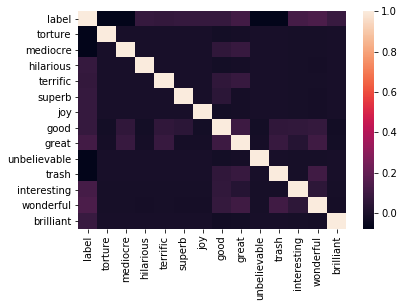

In [10]:
sns.heatmap(df1.corr())

In [11]:
df1.head()

,sentence,label,processed_sentence,torture,mediocre,hilarious,terrific,superb,joy,good,great,unbelievable,trash,interesting,wonderful,brilliant
0,"A very, very, very slow-moving, aimless movie ...",0,"[a, very, very, very, slowmoving, aimless, mov...",0,0,0,0,0,0,0,0,0,0,0,0,0
1,Not sure who was more lost - the flat characte...,0,"[not, sure, who, was, more, lost, , the, flat,...",0,0,0,0,0,0,0,0,0,0,0,0,0
2,Attempting artiness with black & white and cle...,0,"[attempting, artiness, with, black, , white, a...",0,0,0,0,0,0,0,0,0,0,0,0,0
3,Very little music or anything to speak of.,0,"[very, little, music, or, anything, to, speak,...",0,0,0,0,0,0,0,0,0,0,0,0,0
4,The best scene in the movie was when Gerardo i...,1,"[the, best, scene, in, the, movie, was, when, ...",0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
model = BernoulliNB()

data = df1[feature_words]
target = df1['label']

model.fit(data, target)

pred = model.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != pred).sum()
))
print('Accuracy: {}'.format(round((target == pred).sum() / data.shape[0],2)*100))

Number of mislabeled points out of a total 748 points : 310
Accuracy: 59.0


Words with the highest ratios were used for features. Originally used the top 5 positive and negative words with 351 mislabeled points. Best results were with current feature word list. 

# Assignment #2

It's worth calculating these with code so that you fully understand how these statistics work, so here is your task for the cell below. Manually generate (__meaning don't use the SKLearn function__) your own confusion matrix and print it along with the sensitivity and specificity.

In [15]:
def scratch_confusion_matrix(target, pred):
    true_pos = 0
    true_neg = 0
    false_pos = 0
    false_neg = 0

    for i in range(len(target)):
        if (target[i] == 1) and (pred[i] == 1):
                true_pos += 1
        elif (target[i] == 0) and (pred[i] == 0):
                true_neg += 1
        elif (target[i] == 1) and (pred[i] == 0):
                false_neg += 1
        else:
            false_pos += 1
    matrix = np.array([true_neg, false_pos, false_neg, true_pos]).reshape(2,2)
    print('Scratch:\n',matrix)
    

In [16]:
print(confusion_matrix(target,pred))

[[344  18]
 [292  94]]


In [17]:
scratch_confusion_matrix(target,pred)

Scratch:
 [[344  18]
 [292  94]]


# Challenge

It's time to revisit your classifier from the previous assignment. Using the evaluation techniques we've covered here, look at your classifier's performance in more detail. Then go back and iterate by engineering new features, removing poor features, or tuning parameters. Repeat this process until you have five different versions of your classifier. Once you've iterated, answer these questions to compare the performance of each:

Do any of your classifiers seem to overfit?
Which seem to perform the best? Why?
Which features seemed to be most impactful to performance?

In [16]:
pos_neg_ratios.most_common()

[('interesting', 2.4849066497880004),
 ('wonderful', 2.1400661634962708),
 ('sucks', 2.0794415416798357),
 ('brilliant', 1.791759469228055),
 ('hilarious', 1.6094379124341003),
 ('terrific', 1.6094379124341003),
 ('joy', 1.6094379124341003),
 ('silent', 1.6094379124341003),
 ('superb', 1.6094379124341003),
 ('fine', 1.6094379124341003),
 ('liked', 1.5040773967762742),
 ('played', 1.5040773967762742),
 ('job', 1.3862943611198906),
 ('actually', 1.3862943611198906),
 ('song', 1.3862943611198906),
 ('tale', 1.3862943611198906),
 ('true', 1.3862943611198906),
 ('occasionally', 1.3862943611198906),
 ('entertaining', 1.3862943611198906),
 ('become', 1.3862943611198906),
 ('roles', 1.3862943611198906),
 ('parts', 1.3862943611198906),
 ('role', 1.3862943611198906),
 ('yet', 1.3862943611198906),
 ('beginning', 1.3862943611198906),
 ('appreciate', 1.3862943611198906),
 ('white', 1.252762968495368),
 ('makes', 1.252762968495368),
 ('performance', 1.2039728043259361),
 ('long', 1.0986122886681098)

In [20]:
pos_feature_words = [num[0] for num in pos_neg_ratios.most_common(10)]
neg_feature_words = ['imagination', 'storyline', 'mean', 'torture', 'else', 'trash', 
                     'intelligence', 'place', 'word', 'unbelievable']

In [135]:
model = BernoulliNB()
def single_feature_model(df, features_list, model):
    feature_df = df.copy()
    
    for word in features_list:
        feature_df[str(word)] = feature_df.processed_sentence.apply(lambda x: 1 if word in x else 0)
    feature_df.head()
    for i in range(len(features_list)):
        model = BernoulliNB()
        data = np.array(feature_df[features_list[i]]).reshape(-1,1)
        target = feature_df['label']
        target = np.array(target).reshape(-1,1)

        train_x, test_x, train_y, test_y = train_test_split(data, target, test_size = .2, shuffle=True)

        model.fit(train_x, train_y.ravel())

        pred = model.predict(test_x)
        pred = pred.reshape(-1,1)
        
        incorrect_points = (pred != test_y).sum()
        correct_points = test_y.shape[0] - incorrect_points

        print("Number of mislabeled points out of a total {} points : {}".format(
            test_x.shape[0],
            incorrect_points
        ))
        print('Accuracy: {}'.format(round(correct_points / test_y.shape[0],2)*100))

In [136]:
single_feature_model(df, pos_feature_words, model)

Number of mislabeled points out of a total 150 points : 75
Accuracy: 50.0
Number of mislabeled points out of a total 150 points : 74
Accuracy: 51.0
Number of mislabeled points out of a total 150 points : 68
Accuracy: 55.00000000000001
Number of mislabeled points out of a total 150 points : 75
Accuracy: 50.0
Number of mislabeled points out of a total 150 points : 75
Accuracy: 50.0
Number of mislabeled points out of a total 150 points : 85
Accuracy: 43.0
Number of mislabeled points out of a total 150 points : 66
Accuracy: 56.00000000000001
Number of mislabeled points out of a total 150 points : 84
Accuracy: 44.0
Number of mislabeled points out of a total 150 points : 89
Accuracy: 41.0
Number of mislabeled points out of a total 150 points : 94
Accuracy: 37.0


In [35]:
for i in args:
    print(pos_neg_ratios[args])
    

0
0


In [87]:
df.processed_sentence[0]

['a',
 'very',
 'very',
 'very',
 'slowmoving',
 'aimless',
 'movie',
 'about',
 'a',
 'distressed',
 'drifting',
 'young',
 'man']

In [93]:
df.processed_sentence[0]

['a',
 'very',
 'very',
 'very',
 'slowmoving',
 'aimless',
 'movie',
 'about',
 'a',
 'distressed',
 'drifting',
 'young',
 'man']

In [104]:
def total_ratio_score(words):
    score = 0
    for word in words:
        score += pos_neg_ratios[word]
    return score

In [105]:
df['sentiment_score'] = df.processed_sentence.apply(lambda x: total_ratio_score(x))

In [106]:
df.head()

,sentence,label,processed_sentence,sentiment_score
0,"A very, very, very slow-moving, aimless movie ...",0,"[a, very, very, very, slowmoving, aimless, mov...",-1.426435
1,Not sure who was more lost - the flat characte...,0,"[not, sure, who, was, more, lost, , the, flat,...",-4.243065
2,Attempting artiness with black & white and cle...,0,"[attempting, artiness, with, black, , white, a...",-17.080982
3,Very little music or anything to speak of.,0,"[very, little, music, or, anything, to, speak,...",-2.926509
4,The best scene in the movie was when Gerardo i...,1,"[the, best, scene, in, the, movie, was, when, ...",-0.023226


In [153]:
from sklearn.feature_extraction.text import TfidfVectorizer
# list of text documents
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(df.sentence)
# encode sentences
data = vectorizer.transform(df.sentence)

train_x, test_x, train_y, test_y = train_test_split(data, target, test_size = .2, shuffle=True)

model.fit(train_x, train_y.ravel())

pred = model.predict(test_x)
pred = pred.reshape(1,-1)
test_y = np.array(test_y).reshape(1,-1)

incorrect_points = (pred != test_y).sum()
correct_points = test_y.shape[1] - incorrect_points

print("Number of mislabeled points out of a total {} points : {}".format(
    test_x.shape[0],
    incorrect_points
))
print('Accuracy: {}'.format(round(correct_points / test_y.shape[1],2)*100))

Number of mislabeled points out of a total 150 points : 35
Accuracy: 77.0
